# Home Field Advantage and Team Performances In the NFL

By: Braden Sunderland, Darryl Ma, David Yuan, Zelalem Araya
## Introduction and Background Knowledge

In the NFL, the most elite professional American Football league in the world, it is natural to assume that the home teams would perform much better than the away team. This is due to many extraneous factors outside of the field, such as crowd involvement, travel and logistical considerations, and familiarity to the environment and weather conditions.
 <br>
<br>
For instance, crowd involvement during a NFL game is one of the highest in the world with an average attendance of 66,479 per game during 2019 (Gough, 2021). In conjunction, home teams need not concern themselves with the logistics of transportation, and will be more adapted to the local environmental conditions.
<br>
<br>
However, despite the natural presupposition, many prominent sport journalists  question whether playing at home has any influence on the performances in the NFL at all. For instance: Fox Sports speculating that home field barely provides favours in betting odds (Panayotovich, 2021), and The Score doubts whether home-field advantage still exists in the NFL (Cosentino, 2021).
 <br>
<br>
This report aims to examine how NFL teams perform in their home and away games using the dataset created by David Sasser on the 2010 to 2019 season (sourced from Pro Football Reference). Analysis and testing will be performed on the offensive and turnover statistics to answer the question: **Does playing on a team's home field have an affect on team's performance in the NFL?**


## Preliminary Exploratory Data Analysis

The data set is first loaded in directly from the online database, then tidied and organized by grouping similar categorical variables into a single variable. 

In [1]:
# Load necessary packages
library(tidyverse)

# Downloaded dataset from https://www.kaggle.com/davidsasser/nfl-game-stats-20102019/download
nfl_2015 <- read_csv('https://drive.google.com/u/0/uc?id=190TJIdeGAn35LYTkuLiNljLC_UdvFPI6&export=download', show_col_types=FALSE)
nfl_2016 <- read_csv('https://drive.google.com/u/0/uc?id=1MzBKQAow-lSygJzvraebnjwKTl4RIAC4&export=download', show_col_types=FALSE)
nfl_2017 <- read_csv('https://drive.google.com/u/0/uc?id=1UsXj9jItQik0UXbeCtnzQ7ES3GoZepiy&export=download', show_col_types=FALSE)
nfl_2018 <- read_csv('https://drive.google.com/u/0/uc?id=1UqvsJYxQ0NHPApWSSWKvtVguaTH2PnGl&export=download', show_col_types=FALSE)
nfl_2019 <- read_csv('https://drive.google.com/u/0/uc?id=1EVGagzG12fsneqmVTWk5SwbJqi59RoD4&export=download', show_col_types=FALSE)

In [14]:
# Tidy data
nfl_data <- rbind(nfl_2015, nfl_2016, nfl_2017, nfl_2018, nfl_2019)
nfl_data <- nfl_data %>%
    subset(select=-c(Result, Total)) %>%
    group_by(Week) 

#make R readable column names
colnames(nfl_data) <- make.names(colnames(nfl_data))

#Add a Game result column based on the home team
nfl_data <- nfl_data %>%
                mutate(gameResult = case_when(H.Score > A.Score ~ "W",
                                              H.Score < A.Score ~ "L",
                                              H.Score == A.Score ~ "T"))
           
head(nfl_data)

Year,Week,HomeTeam,AwayTeam,H.RushAtt,H.RushYards,H.PassYards,H.Turnover,H.Score,A.RushAtt,A.RushYards,A.PassYards,A.Turnover,A.Score,gameResult
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2015,1,NWE,PIT,24,80,288,0,28,25,134,351,1,21,W
2015,1,BUF,IND,36,147,195,0,27,17,64,243,3,14,W
2015,1,CHI,GNB,33,189,225,1,23,30,133,189,0,31,L
2015,1,ARI,NOR,25,120,307,1,31,20,54,355,1,19,W
2015,1,DAL,NYG,23,80,356,3,27,24,99,189,0,26,W
2015,1,DEN,BAL,25,69,175,1,19,23,73,117,2,13,W


In [18]:
#Home team win percentage
winP <- sum(nfl_data$gameResult == "W") / nrow(nfl_data)
winP

[1] 0.5585938

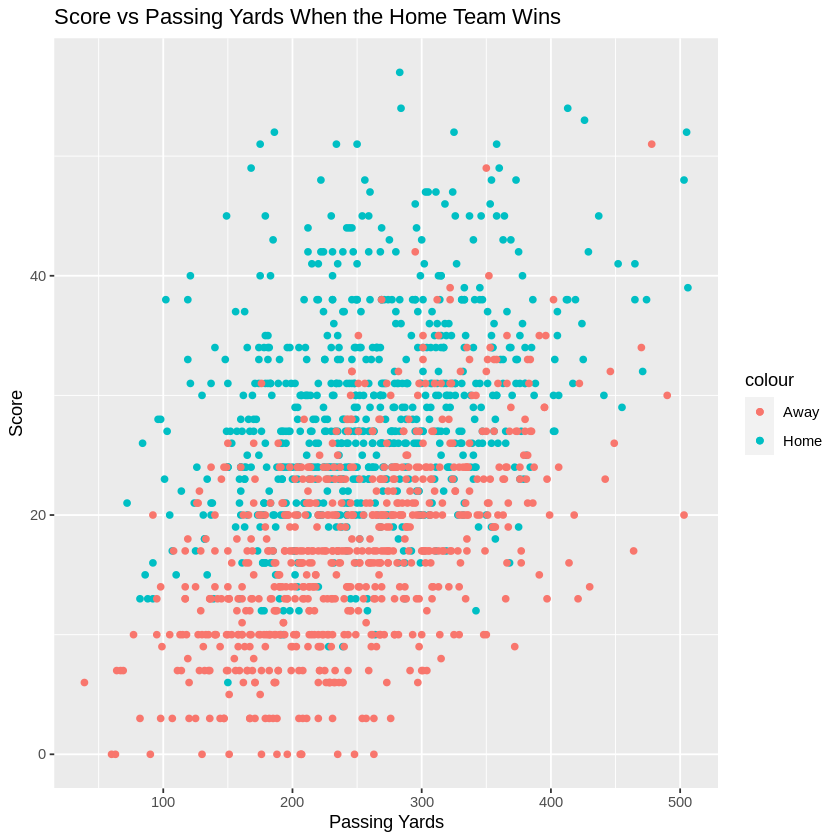

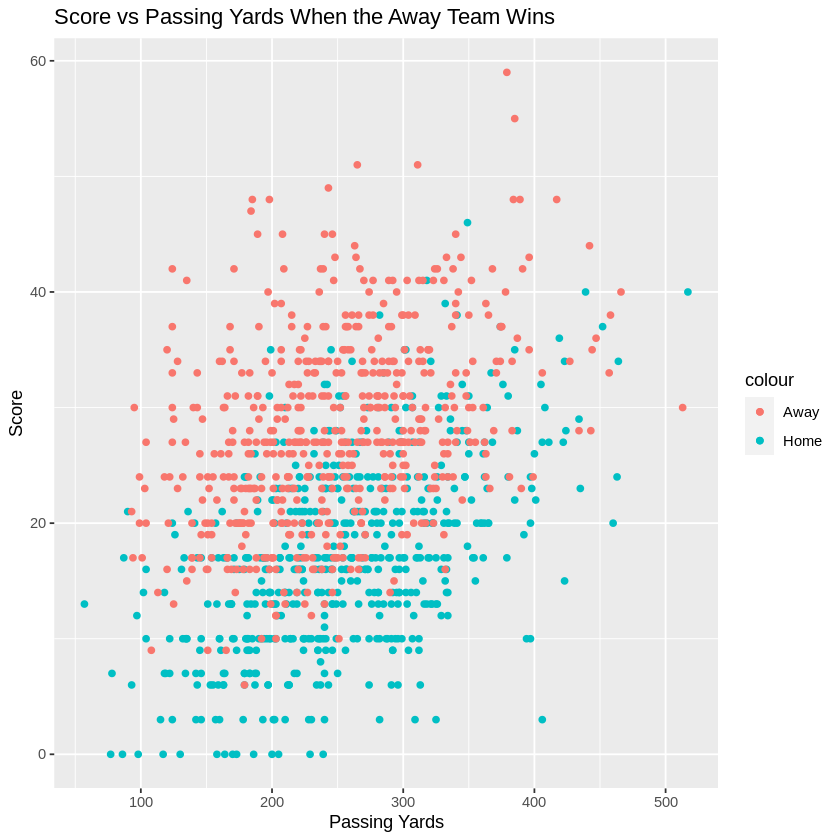

In [46]:
#dataframe containing home team win
nfl_dataHomeW <- nfl_data[nfl_data$gameResult=="W",]

#dataframe containing home team loss
nfl_dataAwayW <- nfl_data[nfl_data$gameResult=="L",]

nfl_dataHomeW %>% ggplot() +
    geom_point(aes(x=H.PassYards, y=H.Score, color='Home')) +
    geom_point(aes(x=A.PassYards, y=A.Score, color='Away')) +
    labs(x='Passing Yards', y='Score') +
    ggtitle('Score vs Passing Yards When the Home Team Wins')
nfl_dataAwayW %>% ggplot() +
    geom_point(aes(x=H.PassYards, y=H.Score, color='Home')) +
    geom_point(aes(x=A.PassYards, y=A.Score, color='Away')) +
    labs(x='Passing Yards', y='Score') +
    ggtitle('Score vs Passing Yards When the Away Team Wins')

## Analysis Methods
To the answer the question stated, the hypothesis testing method will be used with the following hypotheses:
<br>
 - The null hypothesis: Being the home team does not have an effect on team performance.<br>
 - The alternative hypothesis: Being the home team has an effect on team performance.

General “team performance” can be quantified in the dataset by observing passing and rushing yards, rushing attempts, points scored, winning percentage, turnovers, and points against. Therefore we will need a separate hypothesis test for each. For instance: 

Hypothesis test 1: <br>
Delta_pass_yards = difference in mean passing yards in home games and mean passing yards in away games for a given team (defined as a specific team in a specific season).
 - H0: Delta_pass_yards = 0
 - Ha: Delta_pass_yards ≠ 0 <br>
 
A similar hypothesis test will be conducted for each of the metrics we are using. By measuring the difference between the means of each metric, we will be able to determine whether each one is statistically significant, meaning it is likely to have an effect on team performance. 


## Expected Outcomes and Significance

#### What do you expect to find? 
Hence we expect home advantage to significantly affect teams’ capabilities (significantly different mean passing yards, mean rushing yards, etc.) and potentially observe home performances better than away performances.
<br>

#### What impact could such findings have?
The results of the findings could help gauge the real effects of the home field advantage in the NFL. Further conclusions could also unveil whether modern NFL teams can adapt to playing away games more effectively than the past. These results may motivate speculations on calculating betting odds and win probabilities for fantasy teams services.  
#### What future questions could this lead to?
Can the result of this report be observed in other metrics that reflect team performance? <br>
Could similar findings also be observed in other professional sports? <br>
Is there a particular extraneous factor that is the primary cause of home advantage (ex. crowd participation)?



## References
Cosentino, D. (2021, November 5). Does home-field advantage still exist in the NFL? theScore.com. Retrieved March 5, 2022, from https://www.thescore.com/nfl/news/2206259 <br><br>
Gough, C. (2021, March 1). U.S. major sports: Average attendance 2019. Statista. Retrieved March 5, 2022, from https://www.statista.com/statistics/207458/per-game-attendance-of-major-us-sports-leagues/ <br><br>
McGee, B. (2017, September 29). Green Bay Packers home-field advantage; Lambeau Breeds Champions in Titletown. Bleacher Report. Retrieved March 5, 2022, from https://bleacherreport.com/articles/824522-green-bay-packers-home-field-%09advantage-lambeau-breeds-champions-in-titletown <br><br>
Panayotovich, S. (2021, September 23). NFL odds: How much is home-field advantage really worth on the spread? FOX Sports. Retrieved March 5, 2022, from https://www.foxsports.com/stories/nfl/nfl-odds-how-much-home-field-advantage-worth-spread <br><br>
Sasser, D. (2021, January 25). NFL Game Stats (2010-2019). Kaggle. Retrieved March 5, 2022, from https://www.kaggle.com/davidsasser/nfl-game-stats-20102019 <br><br>